<a href="https://colab.research.google.com/github/wlgns222/roka-ai-study/blob/main/deep-learning-from-scratch-vol1/Ch4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ch4. 신경망 학습**

## 4.1 데이터

## 4.2 손실함수

- 최적의 매개변수를 값을 탐색하는 지표
- 임의의 함수를 사용할 수도 있지만 일반적으로 오차제곱합 또는 엔트로피 오차를 사용

### 4.2.1 오차제곱합(SSE)

주로 **회귀** 문제에서 사용되는 손실함수

$$E = \frac{1}{2} \sum_{k} (y_k - t_k)^2$$

- $y_k$: 신경망의 출력 (예측값)
- $t_k$: 정답 레이블 (Target)
- $k$: 데이터의 차원 수

In [ ]:
import numpy as np

#오차제곱합(SSE)
def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

#정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#2가 가장 확률 높다고 추정
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(sum_squares_error(np.array(y1), np.array(t)))

#7이 가장 확률 높다고 추정
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(sum_squares_error(np.array(y2), np.array(t)))

0.09750000000000003
0.5975


=> 오차제곱합 기준으로 첫번째 추정결과가 정답에 가까울 것이라 판단

### 4.2.2 교차 엔트로피 오차(CEE)




주로 딥러닝의 **분류** 문제에서 표준으로 사용되는 손실 함수

$$E = -\sum_{k} t_k \ln y_k$$
- $t_k$는 원-핫 인코딩(One-hot encoding) 형태 (정답인 인덱스만 1, 나머지는 0)
- 실제 식은 정답일 때의 출력값($y_{correct}$)에 대해서만 $E = -\ln y_{correct}$를 계산

In [ ]:
import numpy as np

def cross_entropy_error(y, t):
  delta = 1e-7
  #delta는 아주 작은 값
  #y가 0이면 log(0)이 되어 -inf 를 방지
  return -np.sum(t * np.log(y + delta))


#정답은 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

#2가 가장 확률 높다고 추정
y1 = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print(cross_entropy_error(np.array(y1), np.array(t)))

#7이 가장 확률 높다고 추정
y2 = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
print(cross_entropy_error(np.array(y2), np.array(t)))

0.510825457099338
2.302584092994546


=> 교차 엔트로피 값이 작은 (0.51...) 이 정답일 가능성이 높다 판단

### 4.2.3 미니배치 학습

MNIST 데이터셋 중 N장의 데이터를 추출 후 손실함수를 계산하는 코드 작성

**미니배치 교차 엔트로피 수식**


$$E = -\frac{1}{N} \sum_{n} \sum_{k} t_{nk} \ln y_{nk}$$

In [ ]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git
%cd deep-learning-from-scratch

import numpy as np
from dataset.mnist import load_mnist

#1 데이터로드
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

#2. 미니배치 추출
train_size = x_train.shape[0]
batch_size = 100

batch_mask = np.random.choice(train_size, batch_size)

x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

#3.교차 엔트로피 구현 (정답 레이블이 원-핫 인코딩일 경우)
def cross_entropy_error(y,t) :
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
    # y가 1차원일때 데이터 형상을 바꿈
  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

def cross_entropy_error(y,t) :
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
    # y가 1차원일때 데이터 형상을 바꿈

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size


## 4.3 수치 미분 (Numerical Differention)

###4.3.1 미분

In [7]:
#나쁜 예시

def numerical_diff(f,x):
  h = 1e-50
  return (f(x+h) - f(x)) / h

1. 반올림 오차
    - 1e - 50 : 소수점 아래 0이 50개. 따라서 소수점 아래가 생략되어 최종 결과 계산에 오차가 생김

2. 함수 f의 차분
    - 해당 구현은 f(x+h) 와 f(x) 사이 기울기. 따라서 진정한 의미의 미분이 아님

In [6]:
#두 개선점을 적용한 수치 미분
def numerical_diff(f, x) :
  h = 1e-4
  return (f(x+h)-f(x-h))/2*h

- 이 차분은 x를 중심으로 그 전후를 차분한다는 의미에서 **중심 차분** 혹은 **중앙 차분**(Central Difference) 이라고 함

여기에서처럼 아주 작은 차분으로 미분하는 것을 **수치 미분**이라고 한다.

###4.3.2 수치 미분의 예

$f(x) = 0.01x^2 + 0.1x$

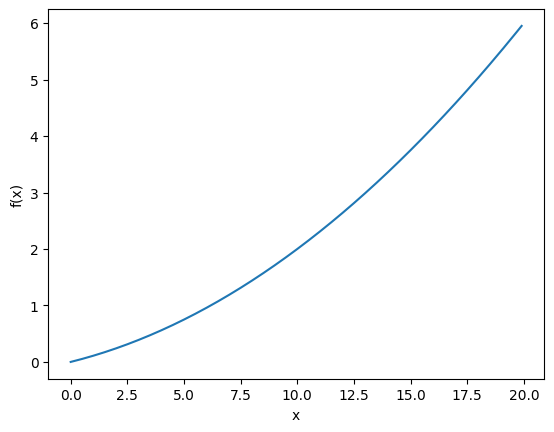

0.1999999999990898
0.2999999999986347


In [13]:
def function1(x) :
  return 0.01*x**2 + 0.1*x

def numerical_diff(f, x) :
  h = 1e-4
  return (f(x+h)-f(x-h))/(2*h)

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x,y)
plt.show()

print(numerical_diff(function1, 5))
print(numerical_diff(function1, 10))

### 4.3.3 편미분

**편미분이란**
1. 수학적 정의 - 여러 변수를 가진 함수에서 특정 변수 하나에 대하여 미분하는 것
2. 기하학적 의미 - 3차원 곡면의 특정 지점에서 **축방향으로만 움직였을 때 경사**

$f(x_0, x_1) = x_0^2 + x_1^2$

In [ ]:
def function2(x) :
  return x[0]**2 + x[1]**2
  #인수 x 는 넘파이 배열